---
title: Feature Selection - S&P500
author: Rachna, Amina, Lizzie, Sophia

format: 
    html: 
        embed-resources: true
        code-fold: true
        toc: true
---

## Preprocessing

In [12]:
library(dplyr)
library(tidyverse)
library(caret)
library(leaps)
suppressWarnings(require(glmnet))

In [13]:
df <- read.csv("merged_data/merged.csv")



# Stepwise Selection

In [14]:
formula <- as.formula("Box.Office ~ SPX + XOM + DIS + PFE + HUBB + BIO + CMCSA +
                        ZION + AAPL + T + BBY + RGEN + ORCL + FCNCA +
                        CERN + TECH + QCOM + JBL + NATI + NFLX + GOOG +
                        DISCA + VIAC + LDOS + MASI + ENPH + VOYA + WIX +
                        SAGE + KEYS + YETI + UBER + Open + High + Low + Adj.Close + Volume")

#formula <- as.formula("Box.Office ~ .")

## Forward

### Selection

In [15]:
regfit.full=regsubsets(formula, data = df, method = "forward", nvmax = 39)
reg.summary=summary(regfit.full)
print(reg.summary)

Subset selection object
Call: regsubsets.formula(formula, data = df, method = "forward", nvmax = 39)
37 Variables  (and intercept)
          Forced in Forced out
SPX           FALSE      FALSE
XOM           FALSE      FALSE
DIS           FALSE      FALSE
PFE           FALSE      FALSE
HUBB          FALSE      FALSE
BIO           FALSE      FALSE
CMCSA         FALSE      FALSE
ZION          FALSE      FALSE
AAPL          FALSE      FALSE
T             FALSE      FALSE
BBY           FALSE      FALSE
RGEN          FALSE      FALSE
ORCL          FALSE      FALSE
FCNCA         FALSE      FALSE
CERN          FALSE      FALSE
TECH          FALSE      FALSE
QCOM          FALSE      FALSE
JBL           FALSE      FALSE
NATI          FALSE      FALSE
NFLX          FALSE      FALSE
GOOG          FALSE      FALSE
DISCA         FALSE      FALSE
VIAC          FALSE      FALSE
LDOS          FALSE      FALSE
MASI          FALSE      FALSE
ENPH          FALSE      FALSE
VOYA          FALSE      FALSE
W

### Metrics

[1] "Optimal R2 Features: 9"

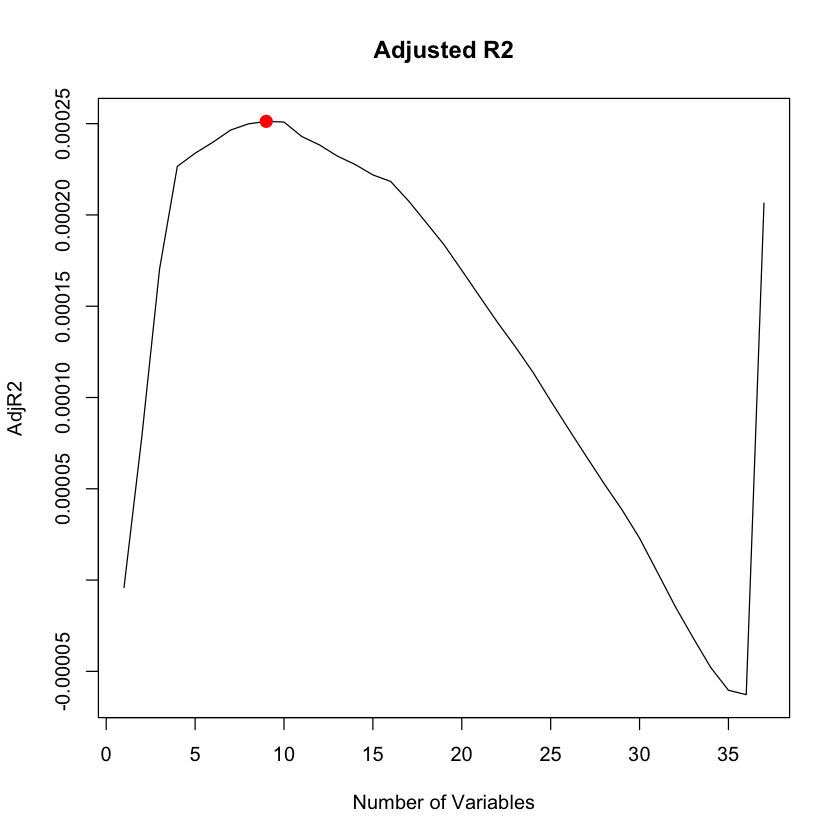

In [16]:
m = which.max(reg.summary$adjr2)
plot(reg.summary$adjr2, xlab = "Number of Variables", ylab = "AdjR2", type = "l", main = "Adjusted R2")
points(m, reg.summary$adjr2[m], col = "red", cex = 2, pch = 20)
paste0("Optimal R2 Features: ", m)

[1] "Optimal BIC Features: 1"

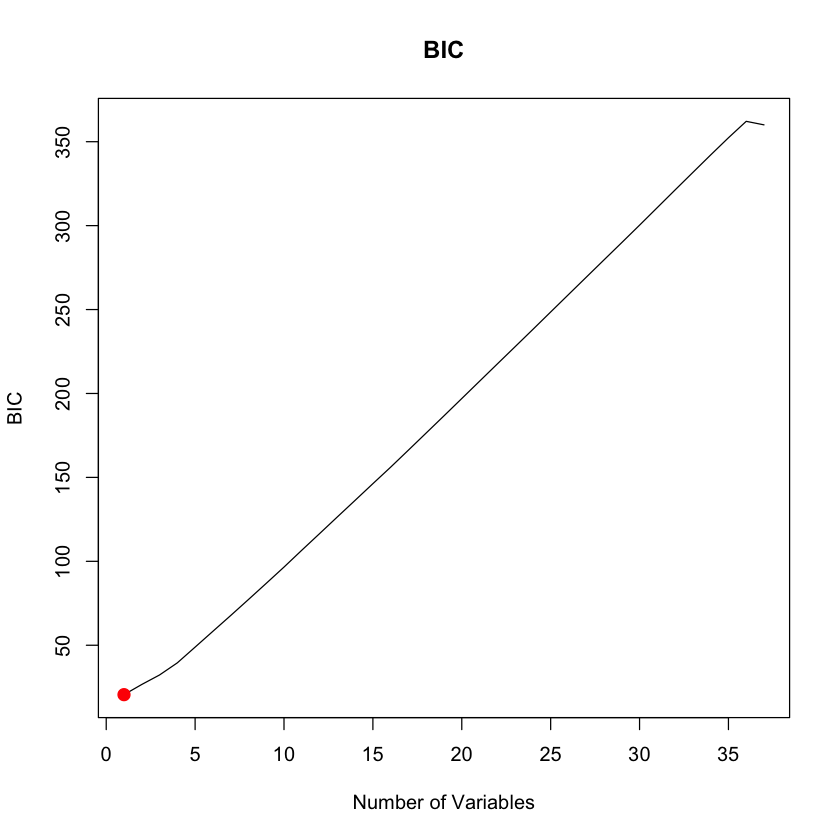

In [17]:
m = which.min(reg.summary$bic)
plot(reg.summary$bic, xlab = "Number of Variables", ylab = "BIC", type = "l", main = "BIC")
points(m, reg.summary$bic[m], col = "red", cex = 2, pch = 20)
paste0("Optimal BIC Features: ", m)


[1] "Optimal Cp Features: 4"

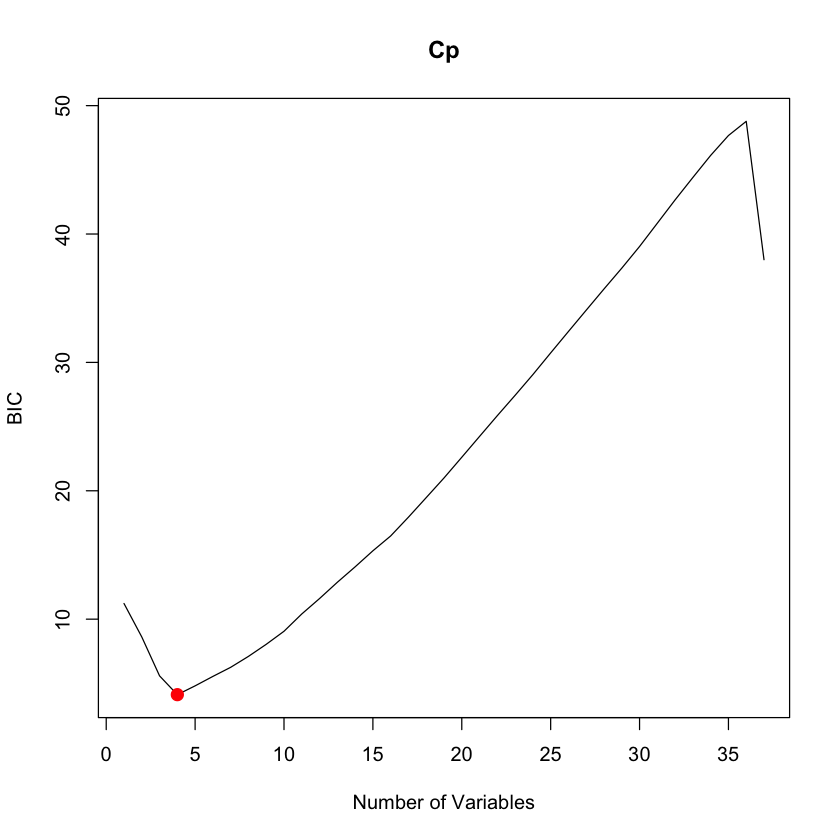

In [18]:
m = which.min(reg.summary$cp)
plot(reg.summary$cp, xlab = "Number of Variables", ylab = "BIC", type = "l", main = "Cp")
points(m, reg.summary$cp[m], col = "red", cex = 2, pch = 20)
paste0("Optimal Cp Features: ", m)

## Backward


### Selection

In [19]:
regfit.full=regsubsets(formula, data = df, method = "backward", nvmax = 39)
reg.summary=summary(regfit.full)
print(reg.summary)

Subset selection object
Call: regsubsets.formula(formula, data = df, method = "backward", nvmax = 39)
37 Variables  (and intercept)
          Forced in Forced out
SPX           FALSE      FALSE
XOM           FALSE      FALSE
DIS           FALSE      FALSE
PFE           FALSE      FALSE
HUBB          FALSE      FALSE
BIO           FALSE      FALSE
CMCSA         FALSE      FALSE
ZION          FALSE      FALSE
AAPL          FALSE      FALSE
T             FALSE      FALSE
BBY           FALSE      FALSE
RGEN          FALSE      FALSE
ORCL          FALSE      FALSE
FCNCA         FALSE      FALSE
CERN          FALSE      FALSE
TECH          FALSE      FALSE
QCOM          FALSE      FALSE
JBL           FALSE      FALSE
NATI          FALSE      FALSE
NFLX          FALSE      FALSE
GOOG          FALSE      FALSE
DISCA         FALSE      FALSE
VIAC          FALSE      FALSE
LDOS          FALSE      FALSE
MASI          FALSE      FALSE
ENPH          FALSE      FALSE
VOYA          FALSE      FALSE


### Metrics

[1] "Optimal R2 Features: 36"

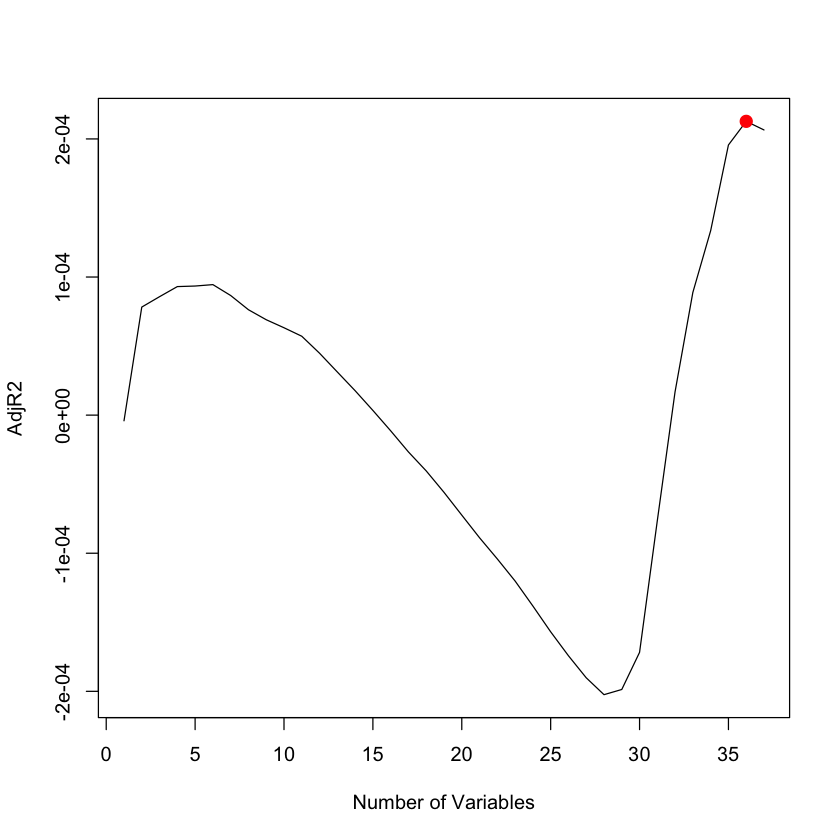

In [20]:
m = which.max(reg.summary$adjr2)
plot(reg.summary$adjr2, xlab = "Number of Variables", ylab = "AdjR2", type = "l")
points(m, reg.summary$adjr2[m], col = "red", cex = 2, pch = 20)
paste0("Optimal R2 Features: ", m)

[1] "Optimal BIC Features: 1"

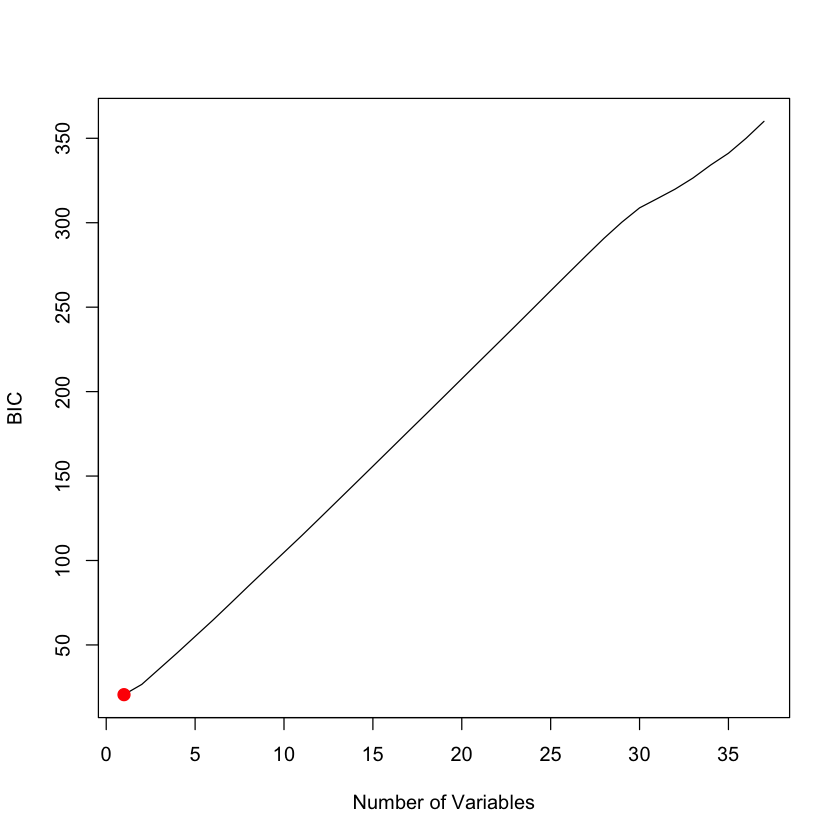

In [21]:
m = which.min(reg.summary$bic)
plot(reg.summary$bic, xlab = "Number of Variables", ylab = "BIC", type = "l")
points(m, reg.summary$bic[m], col = "red", cex = 2, pch = 20)
paste0("Optimal BIC Features: ", m)

[1] "Optimal Cp Features: 2"

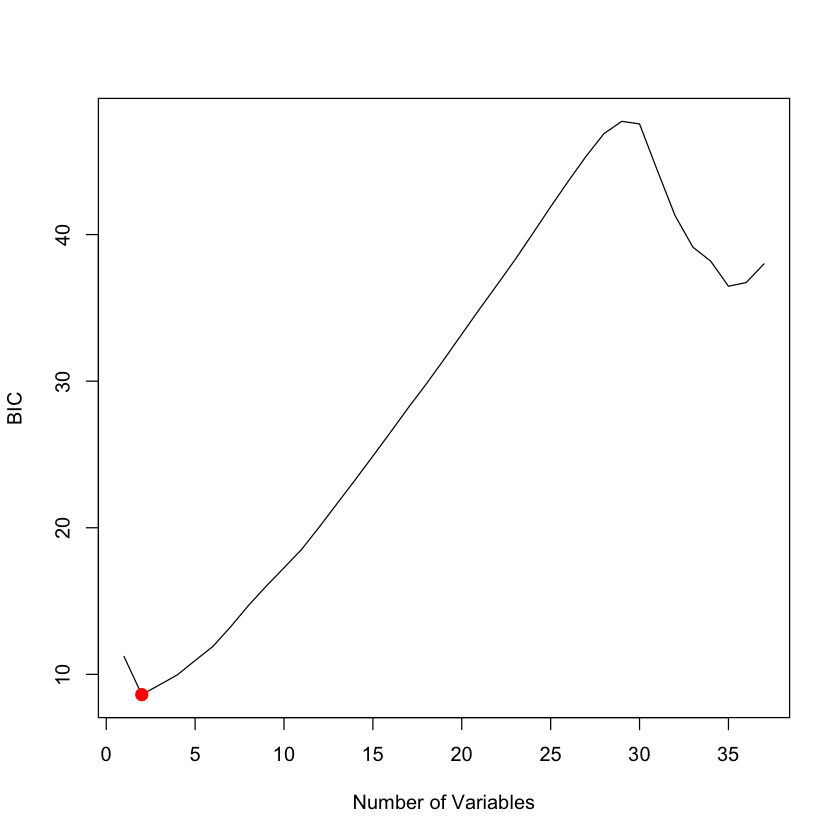

In [22]:
m = which.min(reg.summary$cp)
plot(reg.summary$cp, xlab = "Number of Variables", ylab = "BIC", type = "l")
points(m, reg.summary$cp[m], col = "red", cex = 2, pch = 20)
paste0("Optimal Cp Features: ", m)

## Full

### Selection

In [23]:
regfit.full=regsubsets(formula, data = df, nvmax = 39)
reg.summary=summary(regfit.full)
print(reg.summary)

Subset selection object
Call: regsubsets.formula(formula, data = df, nvmax = 39)
37 Variables  (and intercept)
          Forced in Forced out
SPX           FALSE      FALSE
XOM           FALSE      FALSE
DIS           FALSE      FALSE
PFE           FALSE      FALSE
HUBB          FALSE      FALSE
BIO           FALSE      FALSE
CMCSA         FALSE      FALSE
ZION          FALSE      FALSE
AAPL          FALSE      FALSE
T             FALSE      FALSE
BBY           FALSE      FALSE
RGEN          FALSE      FALSE
ORCL          FALSE      FALSE
FCNCA         FALSE      FALSE
CERN          FALSE      FALSE
TECH          FALSE      FALSE
QCOM          FALSE      FALSE
JBL           FALSE      FALSE
NATI          FALSE      FALSE
NFLX          FALSE      FALSE
GOOG          FALSE      FALSE
DISCA         FALSE      FALSE
VIAC          FALSE      FALSE
LDOS          FALSE      FALSE
MASI          FALSE      FALSE
ENPH          FALSE      FALSE
VOYA          FALSE      FALSE
WIX           FALSE  

### Metrics

[1] "Optimal R2 Features: 9"

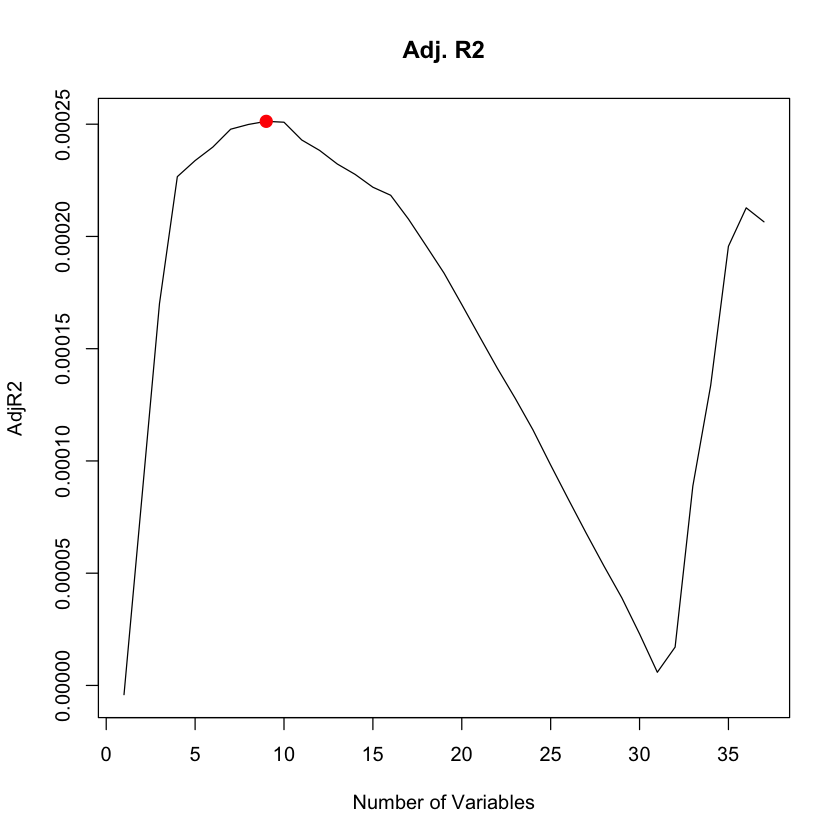

In [24]:
m = which.max(reg.summary$adjr2)
plot(reg.summary$adjr2, xlab = "Number of Variables", ylab = "AdjR2", type = "l", main = "Adj. R2")
points(m, reg.summary$adjr2[m], col = "red", cex = 2, pch = 20)
paste0("Optimal R2 Features: ", m)

[1] "Optimal BIC Features: 1"

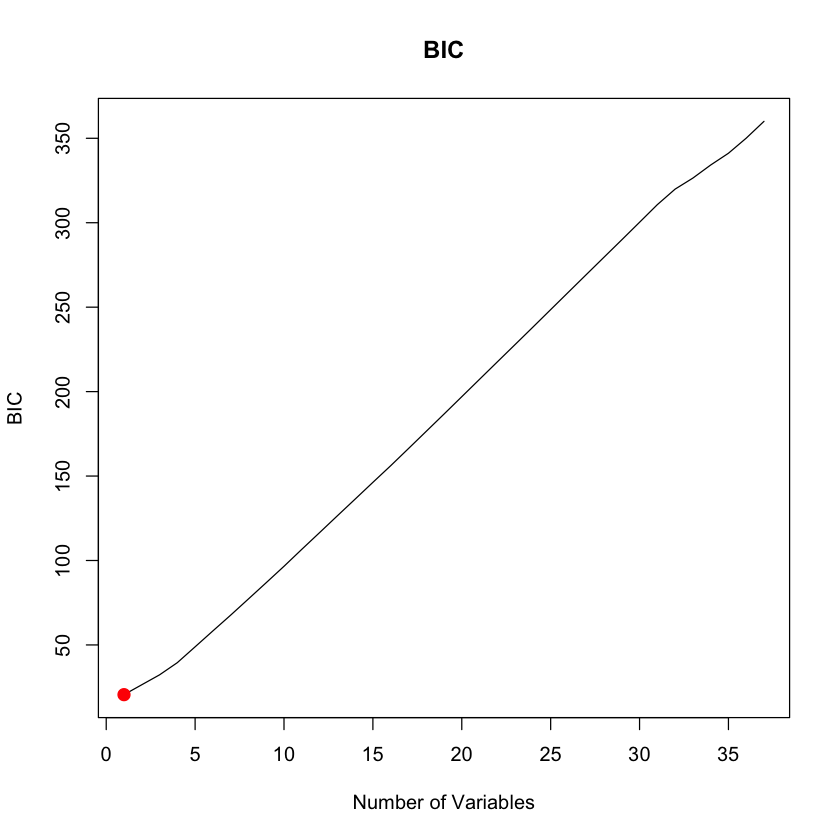

In [25]:
m = which.min(reg.summary$bic)
plot(reg.summary$bic, xlab = "Number of Variables", ylab = "BIC", type = "l", main = "BIC")
points(m, reg.summary$bic[m], col = "red", cex = 2, pch = 20)
paste0("Optimal BIC Features: ", m)

[1] "Optimal Cp Features: 4"

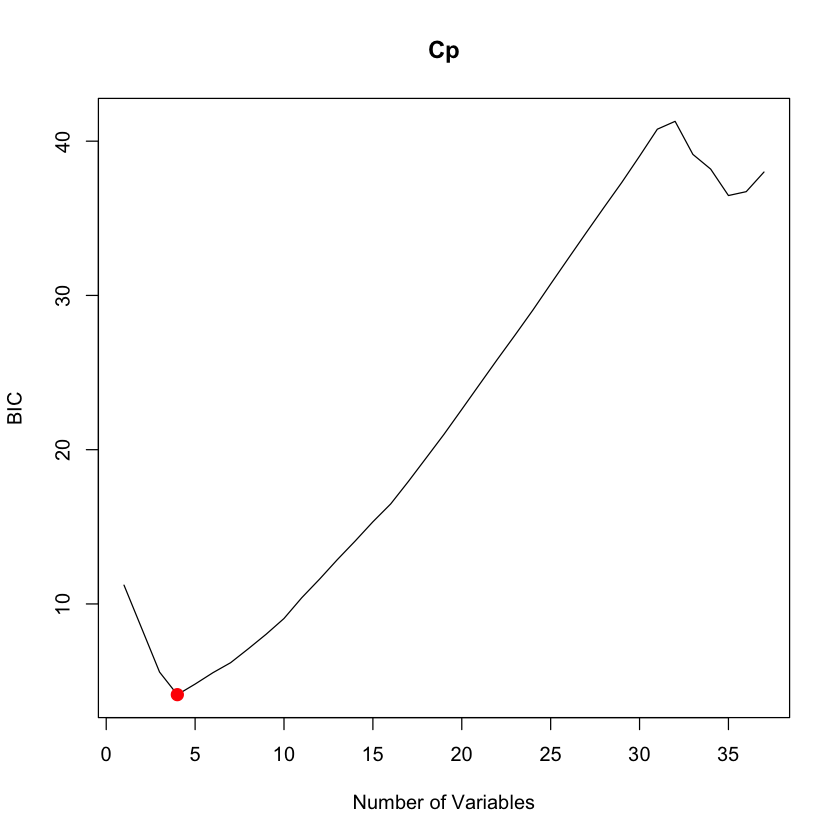

In [26]:
m = which.min(reg.summary$cp)
plot(reg.summary$cp, xlab = "Number of Variables", ylab = "BIC", type = "l", main = "Cp")
points(m, reg.summary$cp[m], col = "red", cex = 2, pch = 20)
paste0("Optimal Cp Features: ", m)

# LASSO

[1] "Lambda when 10 coefficients are non-zero: 218122.300245708"
38 x 1 sparse Matrix of class "dgCMatrix"
                      s1
(Intercept) 7.741268e+07
SPX         .           
XOM         .           
DIS         .           
PFE         .           
HUBB        .           
BIO         .           
CMCSA       .           
ZION        .           
AAPL        .           
T           .           
BBY         .           
RGEN        .           
ORCL        .           
FCNCA       .           
CERN        .           
TECH        .           
QCOM        .           
JBL         .           
NATI        .           
NFLX        .           
GOOG        .           
DISCA       .           
VIAC        .           
LDOS        1.651838e+05
MASI        4.202238e+05
ENPH        1.265201e+06
VOYA        6.459392e+05
WIX         1.793554e+05
SAGE        .           
KEYS        5.964211e+05
YETI        2.824283e+06
UBER        .           
Open        1.255316e+02
High        .     

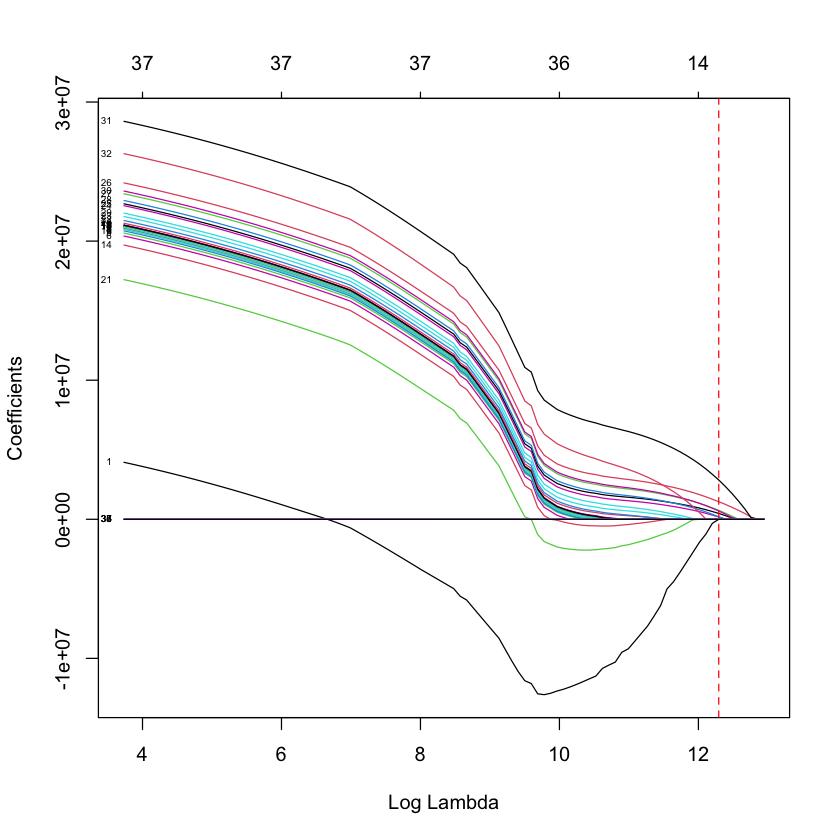

In [33]:
columns_needed <- all.vars(formula)[-1] 
x <- df[, columns_needed]
y <- df$Box.Office
lasso_model <- glmnet(x, y, alpha = 1)

for (lambda_val in lasso_model$lambda) {
  coef_lasso <- coef(lasso_model, s = lambda_val)

  non_zero_coeffs <- sum(coef_lasso != 0) - 1
  if (non_zero_coeffs == 10) {
    print(paste("Lambda when 10 coefficients are non-zero:", lambda_val))
    print(coef_lasso)
    break
  }
}

plot(lasso_model, xvar = "lambda", label = TRUE)
abline(v = log(lambda_val), col = "red", lty = 2)

In [28]:
x_matrix <- as.matrix(x)
lasso_model <- cv.glmnet(x_matrix, y, alpha = 1, nfolds = 10)
lambda_1se <- lasso_model$lambda.1se
paste0("Lambda at 1SE value: ", lambda_1se)

error_1se <- lasso_model$cvm[lasso_model$lambda == lambda_1se]
paste0("Cross-validation estimate for residual standard error (CV error) at 1SE lambda: ", error_1se)


[1] "Lambda at 1SE value: 418338.997940851"

[1] "Cross-validation estimate for residual standard error (CV error) at 1SE lambda: 9340611778677016"